<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/64_Day_Bagging_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd

In [8]:
df=pd.read_csv('/content/Iris.csv')

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df=df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df=df[df['Species'] !=0][['SepalWidthCm','PetalLengthCm','Species']]
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


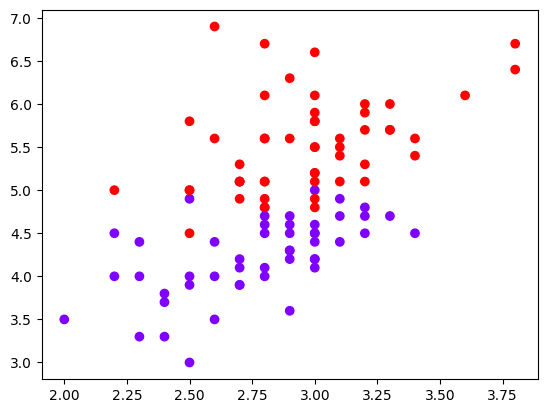

In [15]:
import matplotlib.pyplot as plt

plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='rainbow')

In [16]:
df=df.sample(100)

df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [17]:
df_train

,SepalWidthCm,PetalLengthCm,Species
66,3.0,4.5,1
124,3.3,5.7,2
107,2.9,6.3,2
136,3.4,5.6,2
109,3.6,6.1,2
50,3.2,4.7,1
116,3.0,5.5,2
82,2.7,3.9,1
58,2.9,4.6,1
90,2.6,4.4,1


In [18]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,2].values

# 1. boosting

In [19]:
## Decision Tree 1

df_bagg=df_train.sample(8,replace=True)

X=df_bagg.iloc[:,0:2].values
y=df_bagg.iloc[:,2].values
df_bagg

,SepalWidthCm,PetalLengthCm,Species
66,3.0,4.5,1
90,2.6,4.4,1
58,2.9,4.6,1
136,3.4,5.6,2
58,2.9,4.6,1
109,3.6,6.1,2
58,2.9,4.6,1
109,3.6,6.1,2


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

dt_1=DecisionTreeClassifier()


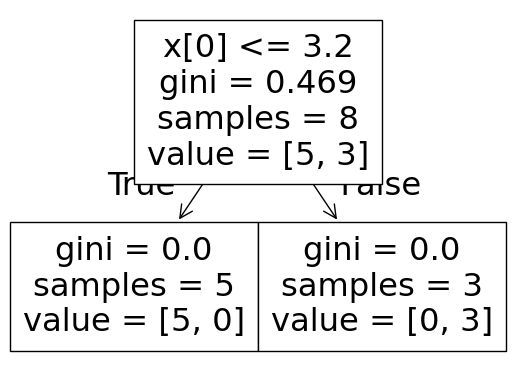

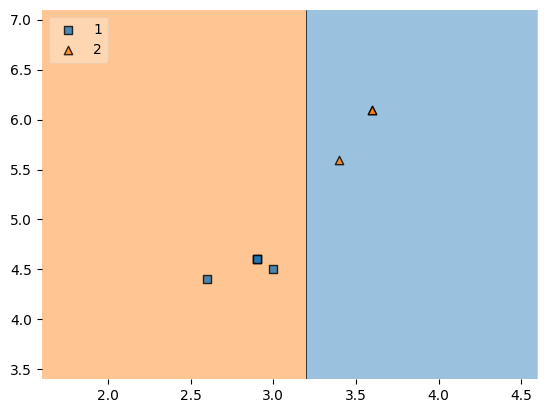

1.0


In [28]:
evaluate(dt_1,X,y)

In [27]:
def evaluate(model,X,y):
  model.fit(X,y)
  plot_tree(model)
  plt.show()
  plot_decision_regions(X,y,model,legend=2)
  plt.show()
  y_pred=model.predict(X)
  print(accuracy_score(y,y_pred))

In [29]:
# decision Tree 2
df_bagg=df_train.sample(8,replace=True)

X=df_bagg.iloc[:,0:2].values
y=df_bagg.iloc[:,2].values
df_bagg

,SepalWidthCm,PetalLengthCm,Species
58,2.9,4.6,1
136,3.4,5.6,2
136,3.4,5.6,2
124,3.3,5.7,2
66,3.0,4.5,1
116,3.0,5.5,2
82,2.7,3.9,1
66,3.0,4.5,1


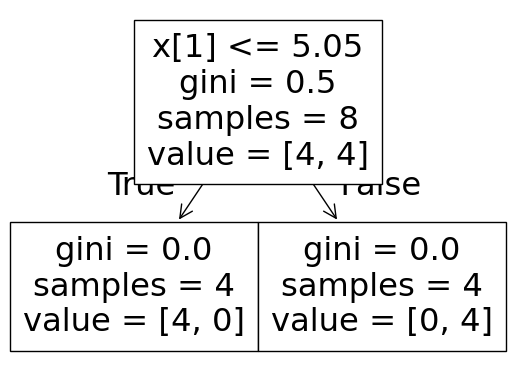

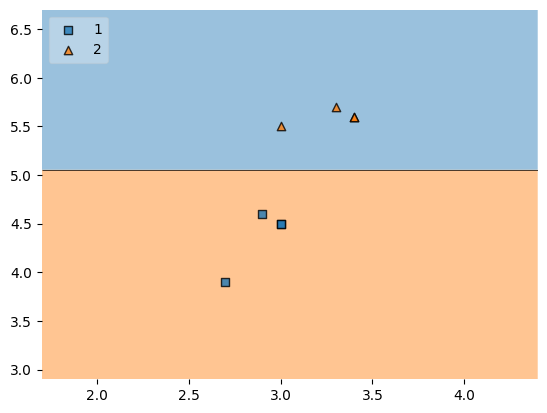

1.0


In [30]:
dt_2=DecisionTreeClassifier()
evaluate(dt_2,X,y)

In [31]:
# Decision Tree 3
df_bagg=df_train.sample(8,replace=True)

X=df_bagg.iloc[:,0:2].values
y=df_bagg.iloc[:,2].values
df_bagg


,SepalWidthCm,PetalLengthCm,Species
58,2.9,4.6,1
82,2.7,3.9,1
58,2.9,4.6,1
66,3.0,4.5,1
50,3.2,4.7,1
82,2.7,3.9,1
124,3.3,5.7,2
109,3.6,6.1,2


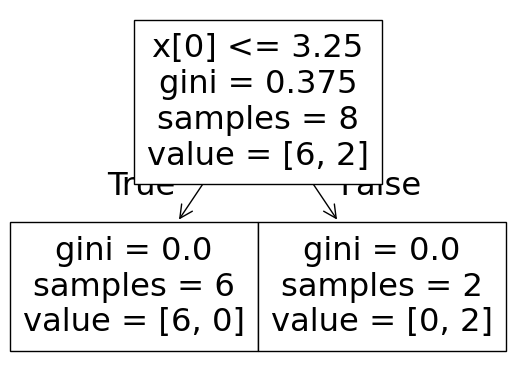

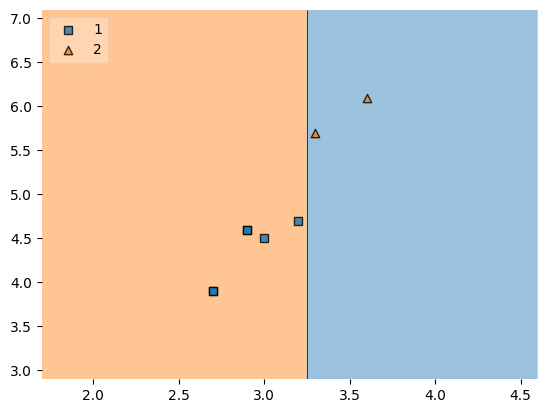

1.0


In [32]:
dt_3=DecisionTreeClassifier()
evaluate(dt_3,X,y)

# Predict

In [34]:
df_test

,SepalWidthCm,PetalLengthCm,Species
92,2.6,4.0,1
97,2.9,4.3,1
142,2.7,5.1,2
100,3.3,6.0,2
141,3.1,5.1,2


In [41]:
print("pred 1=", dt_1.predict(np.array([2.6	,4.0]).reshape(1,2)))
print("pred 2=", dt_2.predict(np.array([2.6	,4.0]).reshape(1,2)))
print("pred 3=", dt_3.predict(np.array([2.6	,4.0]).reshape(1,2)))

pred 1= [1]
pred 2= [1]
pred 3= [1]


# Type of Bagging

# 1. Pasting

In [43]:
# row sampling without replacement

df_train.sample(8) # no row repeate

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
107,2.9,6.3,2
116,3.0,5.5,2
109,3.6,6.1,2
50,3.2,4.7,1
58,2.9,4.6,1
82,2.7,3.9,1
124,3.3,5.7,2


# 2. Random SubSpaces

In [46]:
# column sampling with / without replacement

df1=pd.read_csv('/content/Iris.csv')
df1.sample(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
140,141,6.7,3.1,5.6,2.4,Iris-virginica
11,12,4.8,3.4,1.6,0.2,Iris-setosa
24,25,4.8,3.4,1.9,0.2,Iris-setosa
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
101,102,5.8,2.7,5.1,1.9,Iris-virginica


In [52]:
df1_train=df1.sample(2,replace=True, axis=1)# axis =1 -> column selection
df1_train

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


# Random Patches

In [53]:
# row and column both sampling
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [62]:

row=df1.sample(8,replace=True)
row

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
44,45,5.1,3.8,1.9,0.4,Iris-setosa
106,107,4.9,2.5,4.5,1.7,Iris-virginica
124,125,6.7,3.3,5.7,2.1,Iris-virginica
21,22,5.1,3.7,1.5,0.4,Iris-setosa
44,45,5.1,3.8,1.9,0.4,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa
140,141,6.7,3.1,5.6,2.4,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa


In [63]:
df1_train=row.sample(2,replace=True, axis=1)
df1_train

,SepalLengthCm,Id
44,5.1,45
106,4.9,107
124,6.7,125
21,5.1,22
44,5.1,45
30,4.8,31
140,6.7,141
0,5.1,1


In [64]:
df1.sample(8,replace=True).sample(2,replace=True, axis=1)

,Species,Id
27,Iris-setosa,28
121,Iris-virginica,122
21,Iris-setosa,22
27,Iris-setosa,28
123,Iris-virginica,124
124,Iris-virginica,125
81,Iris-versicolor,82
56,Iris-versicolor,57
